<a href="https://colab.research.google.com/github/jnkharel2024/projects/blob/main/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 1.8 MB/s 


In [ ]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 200
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('worldcup since:2022-11-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])

In [ ]:
tweets_to_df.head() #lists first 5 tweets

,Tweets,cleanedTweets
0,I keep praising how the whole team from Korea ...,I keep praising how the whole team from Korea ...
1,@JOAOISALIVE @JustforFT @T_onads @utdcynical B...,Brazil didn't have a first half World Cup ...
2,"Following LEGO Star Wars The Skywalker Saga, T...","Following LEGO Star Wars The Skywalker Saga, T..."
3,I’ve been a football fan &amp; follower since ...,I’ve been a football fan &amp; follower since ...
4,Never thought it was possible to witness a bo...,Never thought it was possible to witness a bo...


In [ ]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,I keep praising how the whole team from Korea ...,I keep praising how the whole team from Korea ...
1,@JOAOISALIVE @JustforFT @T_onads @utdcynical B...,Brazil didn't have a first half World Cup ...
2,"Following LEGO Star Wars The Skywalker Saga, T...","Following LEGO Star Wars The Skywalker Saga, T..."
3,I’ve been a football fan &amp; follower since ...,I’ve been a football fan &amp; follower since ...
4,Never thought it was possible to witness a bo...,Never thought it was possible to witness a bo...


In [ ]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

In [ ]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,I keep praising how the whole team from Korea ...,0.356944,0.084722
1,Brazil didn't have a first half World Cup ...,0.250000,-0.055556
2,"Following LEGO Star Wars The Skywalker Saga, T...",0.225000,-0.200000
3,I’ve been a football fan &amp; follower since ...,0.750000,0.585938
4,Never thought it was possible to witness a bo...,1.000000,-0.500000


In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [ ]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    111
Negative     51
Neutral      39
Name: Analysis, dtype: int64

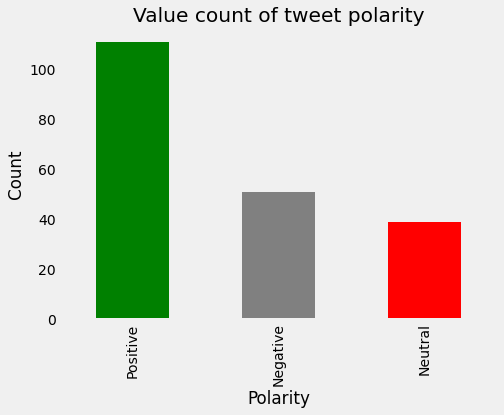

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

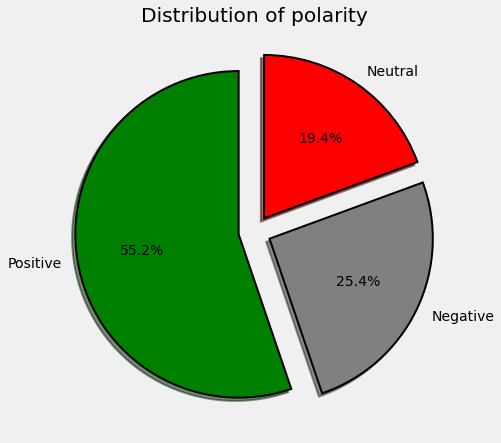

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

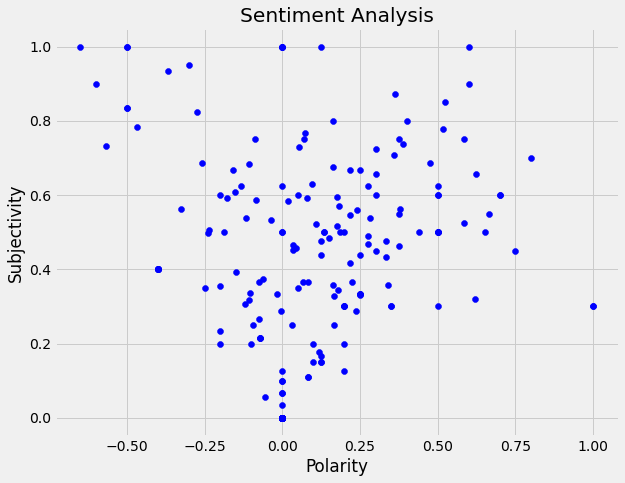

In [ ]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

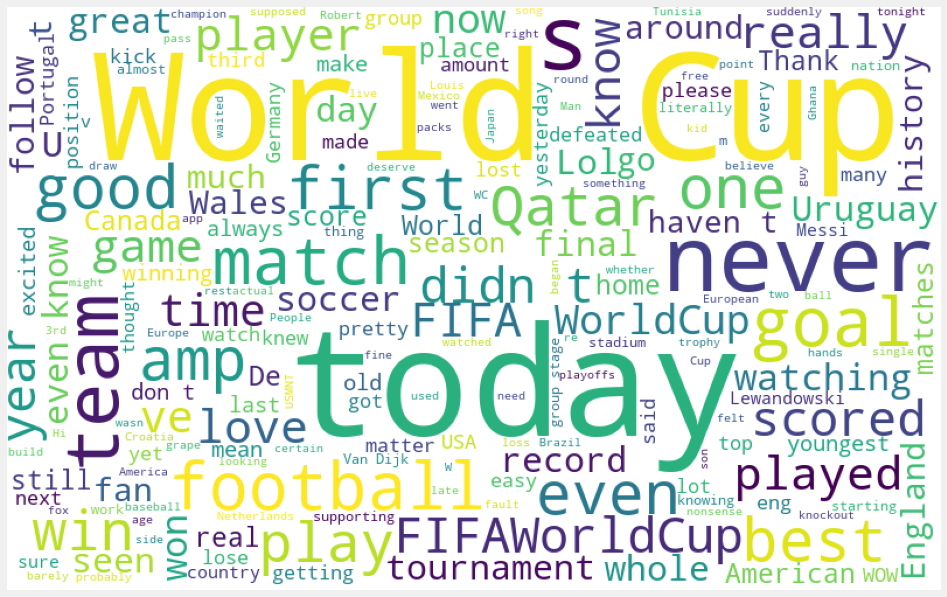

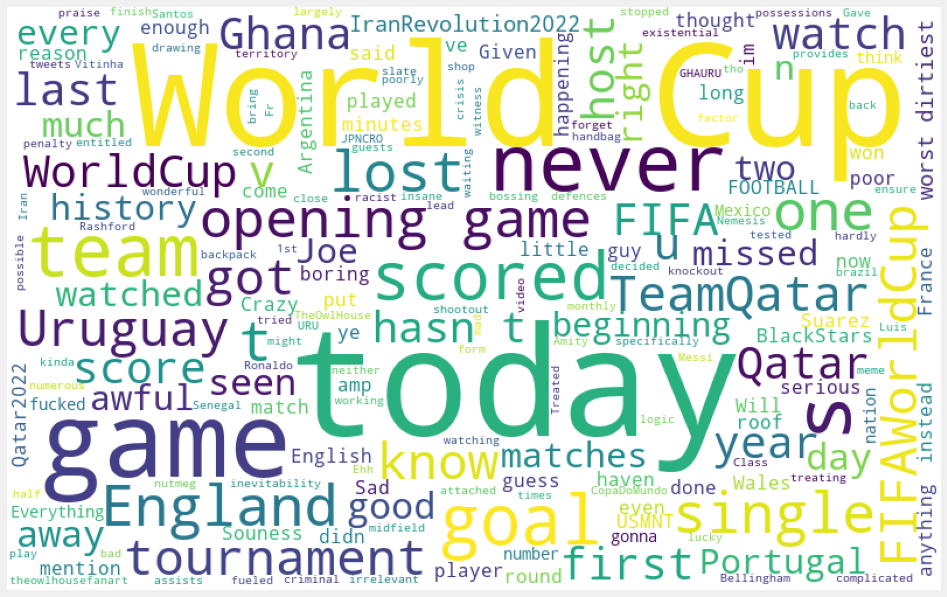

In [ ]:
#create a function for wordcloud
def create_wordcloud(text):
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [ ]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['My',
 'half-time',
 'homework:',
 'England’s',
 'record',
 'in',
 'World',
 'Cup',
 'knockout',
 'games']

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

world          175
cup            144
today           97
today.          50
today,          48
              ... 
didn't...        1
47               1
other…until      1
won,             1
forgot           1
Name: 0, Length: 1295, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


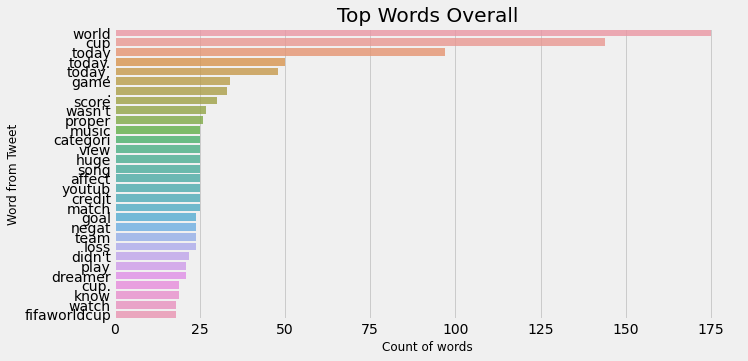

In [ ]:
#plots the top 30 used words
df = df[:30]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()